In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Description of the data:

* Each observation (row) in this dataset is a review of a particular business by a particular user.
* The stars column is the number of stars (1 through 5) assigned by the reviewer to the business. In other words, it is the rating of the business by the person who wrote the review.
* The text column is the text of the review.
* The cool/useful/funny fields represent the comments on the review left by other users


# Load Data

In [7]:
business = pd.read_csv('yelp_business.csv')
review = pd.read_csv('yelp_review.csv')

business.shape
review.shape

(5261668, 9)

I notice that there are 5261668 review texts that are present in the dataset. In terms of comuputational efficiency creating random sampled version of the dataset makes sense. 

In [8]:
review_sample = review.sample(frac = 0.1, replace = False, random_state=13)
review_sample.shape
review_sample.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
1514311,w2JuB9QqfV5O3S3Q7vfg_Q,sQUQavVTsC7HqJFdW97XNg,LfJU-BYW5WTh8y7gFfPOfw,5,2017-02-26,"Oasis is great! I went later in the evening, s...",1,0,1
3312823,w9kjHOphrugGkygf9QUo2Q,aZVKgTkftSHHe45qr6Yq7w,WlBvw6R1Qe2yIaZp-2ilZA,4,2014-08-21,What an interesting place. We stopped here fo...,1,1,1
1264106,zsbolGlLhuUuIlS5MPKS2g,ZvKVqKJ5AcdEulB5rKlRCg,X-ZAD3eMkThGL9hrKdQooQ,5,2013-05-25,This is THE spot in Phoenix for fried fish and...,5,0,1
4107793,9w5_HYf5_1sIHKz-grPg9w,ENtSjbekFHjltp2TFkstHg,4JNXUYY8wbaaDmk3BPzlWw,5,2012-05-17,BONJOUR!!!!! \n\nI am not a big fan of Frenchy...,4,6,6
5174782,RGsZ2RxICtpikJUlCAKYhg,NeJmKmZygkrzy-ODayqDSQ,Xd6yHhyFYgHzth0ou2FtkQ,5,2015-07-07,Amazing. I actually thought it was better coff...,0,0,0


Adding a new variable to represent the length of the reviews enables us to see if there is any relation between the sentiment and lenght of the review. 

In [9]:
review_sample['text length'] = review_sample['text'].apply(len)
review_sample.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text length
1514311,w2JuB9QqfV5O3S3Q7vfg_Q,sQUQavVTsC7HqJFdW97XNg,LfJU-BYW5WTh8y7gFfPOfw,5,2017-02-26,"Oasis is great! I went later in the evening, s...",1,0,1,557
3312823,w9kjHOphrugGkygf9QUo2Q,aZVKgTkftSHHe45qr6Yq7w,WlBvw6R1Qe2yIaZp-2ilZA,4,2014-08-21,What an interesting place. We stopped here fo...,1,1,1,440
1264106,zsbolGlLhuUuIlS5MPKS2g,ZvKVqKJ5AcdEulB5rKlRCg,X-ZAD3eMkThGL9hrKdQooQ,5,2013-05-25,This is THE spot in Phoenix for fried fish and...,5,0,1,865
4107793,9w5_HYf5_1sIHKz-grPg9w,ENtSjbekFHjltp2TFkstHg,4JNXUYY8wbaaDmk3BPzlWw,5,2012-05-17,BONJOUR!!!!! \n\nI am not a big fan of Frenchy...,4,6,6,2369
5174782,RGsZ2RxICtpikJUlCAKYhg,NeJmKmZygkrzy-ODayqDSQ,Xd6yHhyFYgHzth0ou2FtkQ,5,2015-07-07,Amazing. I actually thought it was better coff...,0,0,0,235


The distribution of text length looks similar across all five ratings. However, the count of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings.

The boxplot shows that reviews with a lower star rating (i.e 1 and 2) tend to have a higer median length as compared to the higher star reviews. We can infer that when people are unhappy or want to express a negative sentiment, they tend to write more content in the reviews. So, a shorter review is not always a bad indicator as these could mean users with positive sentiment use fewer words describing their experience.

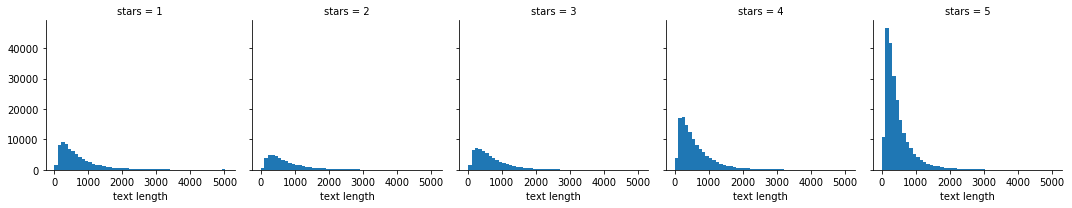

In [12]:
g = sns.FacetGrid(data=review_sample, col='stars')
g.map(plt.hist, 'text length', bins=50)
plt.show()

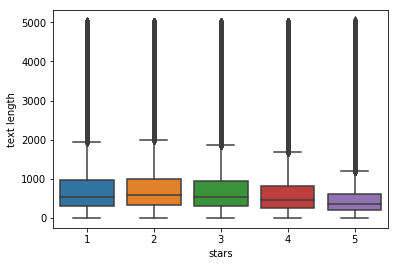

In [11]:
box = sns.boxplot(x='stars', y='text length', data=review_sample)
plt.show()

We will filter the dataset to contain only the 5-star and 1-star reviews as they represent opposite sentiments and will enable us to design the problem into a simple binary classification as opposed to a multinomial classification problem otherwise.

In [13]:
review_one_five = review_sample[(review_sample.stars==5) | (review_sample.stars==1)]
review_one_five['Positive'] = np.where(review_one_five['stars']>1, 1, 0)
review_one_five.shape

# examine the class distribution
# review_one_five.head(10)
pd.crosstab(index = review_one_five['Positive'], columns="Total count")

C:\Users\09322\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


col_0,Total count
Positive,
0,73471
1,225711


The dataset that we will be using for model building and validation has class imbalance as seen from the class distribution of reviews.(0 = 73471, 1 = 225711) Since the difference is not huge let the proportion be same as this, if the difference in proportion is huge such as 90% of data belongs to one class and 10% belongs to other then it creates some trouble, in our case it is roughly around 25% which is Okay. We can use sklearn.model_selection.StratifiedShuffleSplit() for correcting imbalanced classes, The splits are done by preserving the percentage of samples for each class. Splitting Train and Test Set, you are going to split using scikit learn sklearn.model_selection.train_test_split() which is random split of datset in to train and test sets.

In [14]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(review_one_five['text'], review_one_five['Positive'], random_state=0)

print('X_train first entry:\n\n', X_train.iloc[2])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 If I could give this place 0 stars I would. I hate cigarette smoke, so the fact that it's 2017 and the whole bar is still a smoking area is a bit of a turn off. I could overlook that and give this place a chance, but their female bartender has to be the absolute rudest person I ever had the displeasure of dealing with. The place was busy, but my friend and I tipped well with every drink (while others didn't tip at all). Then when ordering another round of drinks, we watched as she went around the entire bar not once, not twice, but three times skipping over us each time. On the third time around, my friend gasped in disbelief - not on purpose, that was just her involuntary reaction because that's how ridiculous it was. The bartender addressed that by saying "go somewhere else and wait even longer then." So we grabbed our stuff, walked down the street, and were immediately served in the next bar we went to. We did not mind waiting, we knew it was busy so we empath

Now, we'll perform processing on individual sentences or reviews. Each individual review is tokenized into words. Word tokenization is performed using a sklearn.feature_extraction.text.CountVectorizer(). Tokenization converts a collection of text documents to a list of token counts, produces a sparse representation of the counts. For example, if you have a text document "If I could give this place 0 stars I would", then .CountVectorizer() will convert this text (string) to list format [if, I, could, give, this, place, 0, stars, would].

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
# Array mapping from feature integer indices to feature name
# vect.get_feature_names()[::2000]

A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing. Now we have tokenized matrix of text document or reviews, we can use Logistic Regression or any other classifier to classify between the Negative and Positive Reviews for the limitation of this tutorial and just to show the intent of text classification and feature extraction techniques let us use logistic regression. Before you do that just have a look how feature matrix look like, using Vectorizer.transform() to make a document term matrix.

In [18]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print('Shape of matrix', X_train_vectorized.shape)
print(X_train_vectorized.toarray()[2])

Shape of matrix (224386, 129659)


MemoryError: 

# First Classification Model
Now, we are ready to build first classification model, we are using sklearn.linear_model.LogisticRegression() from scikit learn as our first model.

In [19]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

From the Logistic Regression output we can use AUC metric to validate or test the model on test dataset, just to make sure how good a model is performing on new dataset.

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.9653411128399818


It is a pretty good Score for initial modelling, let us try out if we can further improve the model score.

Text(0.5,0,'False Positive Rate')

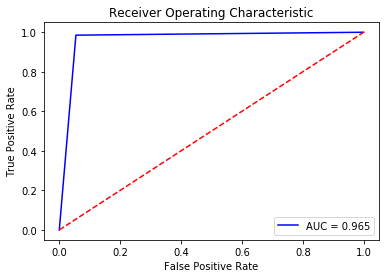

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# TF-IDF

(TF-IDF) is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

There are some parameters which needs to be defined while building vocabullary or Tf-Idf matrix such as, min_df and max_df.

* min_df is used for removing terms that appear too infrequently. For example:
* min_df = 0.05 means "ignore terms that appear in less than 5% of the documents".
* min_df = 5 means "ignore terms that appear in less than 5 documents".
* max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

 This can be considered as a hyperparmater which directly affects accuracy of the model so we need to do a grid search to find what value of min_df or max_df gives best result, again it highly depends on your data. This value is also called cut-off in the literature.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 0.05 and 
#maximum document frequency of 0.50; 
# we can play with it and see how accuracy changes 
vect_tf = TfidfVectorizer(min_df=0.05, max_df=0.50).fit(X_train)

X_train_vectorized_tf = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized_tf, y_train)
predictions_tf = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions_tf))

AUC:  0.9653411128399818


# N-Gram

Unigram means a single word. In a unigram tagger, a single token is used to find the particular parts-of-speech tag. So when you extend a token to be comprised of more than one word for example if a token is of size 2, is a "bigram" ; size 3 is a "trigram", "four-gram", "five-gram" and so on to "n-grams". An N-gram is simply a sequence of N  words. Basically, an N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. 

In [23]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams, 2-grams and 3-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [24]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.975354966479385


Thanks to the n-gram technique we were able to increase the AUC value from 0.965 to0.975.

In [25]:
from sklearn import metrics
# print the confusion matrix
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, predictions))
# print the accuracy of its predictions
print('Accuracy: ', metrics.accuracy_score(y_test, predictions))

Confusion Matrix: 
[[17649   731]
 [  537 55879]]
Accuracy:  0.9830472217765656


In [27]:
# use Multinomial Naive Bayes to predict the star rating
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc_score(y_test, predictions))

# print the accuracy of its predictions
print('Accuracy: ', metrics.accuracy_score(y_test, predictions))
# print the confusion matrix
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, predictions))

AUC:  0.9587655525068866
Accuracy:  0.9615353762233274
Confusion Matrix: 
[[17522   858]
 [ 2019 54397]]


To benchmark our model, we build a baseline model and compute the null accuracy, which is the classification accuracy that could be achieved by always predicting the most frequent class(i.e a review rating of 5). The improvement over the baseline model would be a true representation of how good our model is.

Both the Logistic Regression model with an accuracy of 98.30% and The Naive Baye model with an accuracy of 96.15% show a substantial improvement over the baseline model which shows an accuracy of 75.4%.

In our classification problem, both of the models have taken 5 star rating as positive class and 1 star rating as a negative class. The errors made by the models in binary classification problems can be of two types - False positives and False negatives.

FALSE POSITIVE A false positive is a scenario where the actual label is 0 but the predicted label is 1. In this scenario if we predict an actual bad rating(1 star) as a good rating(5 star) we can call the observation to be a false positive

FALSE NEGATIVE A false negative is a scenario where the actual label is 1 but the predicted label is 0. In this scenario if we predict an actual good rating(5 star) to be a bad rating(1 star) we can call the observation to be a false negative

We can review the records which are false positives to analyze where the model is making mistakes. This intuition can help improve the accuracy in subsequent model iterations.


In [31]:
#####Filter out a sample of false positives#####
X_test[y_test < predictions].sample(10, random_state=1313)

2687998    Eno Vino has slid downhill BIGtime.  It used t...
1126890    Way way way too much frosting! How much sugar ...
432202     Service was good...chicken was RAW. Calamari w...
2802090    Wir waren gestern zum ersten Mal hier und wahr...
4997833    I read the reviews on here, they sounded prett...
2857631    Este Mcdonald's no merece ni una estrella. \nP...
2307917    Stuggi Burger fand ich ziemlich gut, bis ich d...
1682995    Wie bereits eine Vorrednerin angemerkt hat, ha...
4906812    We went for dinner, with trepidation, since pa...
307358     Ferguson joined me on a business trip here and...
Name: text, dtype: object

We can review the records which are false negatives to analyze where the model is making mistakes. This intuition can help improve the accuracy in subsequent model iterations.

In [33]:
######Filter out a sample of false negatives#####
X_test[y_test > predictions].sample(10, random_state=1313)

2211564    I needed a pane of glass replaced for a frame ...
2127616    I had a muscle injury & the doctor gave me a 3...
5128441    I rarely ever leave positive feedback, mainly ...
2114895    Some douchebag told me that "Hearst Castle" is...
3727631    I don't have many complaints about this place....
1068646    Driving through LV and the ac went out on a 11...
3615500    I was in need of some last minute event suppli...
116100     I had 1st call come out when my door went off ...
4517943    Called two good plumbers about 7:20 in the mor...
5204385    Love it! She got me in right away. Now I can s...
Name: text, dtype: object

It seems that Naive Bayes model is having difficulty to classify reviews which are sarcastic. This is one of the primary reasons for misclassification. Another example could be the case of double negation being used to indicate something positive. Two negative tokens can be combined to talk about something positive. This correlation between features will result in false classification as this model assumes features independence.

Both Logistic Regression and Naive Bayes does not work well when there is class imbalance. The current data we trained on has strong imbalance and that can be one of the possible reasons for misclassification.

We can also notice that there is a tendency for negative reviews to be much longer in detail. A quick examination shows some of the positive reviews have been pretty long and are misclassified. Including this feature along with the document-term matrix can further improve accuracy.

We can further get some intuition on the the sentiment analysis by looking at the top tokens present in positive and negative reviews. We calculate which 10 tokens are the most predictive of 5-star reviews, and which 10 tokens are the most predictive of 1-star reviews.

In [34]:
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

# Logistic regression counts the number of times each token appears in each class
model.feature_count_

# rows represent classes, columns represent tokens
model.feature_count_.shape

# number of times each token appears across all one star reviews
one_star_token_count = model.feature_count_[0, :]
one_star_token_count

# number of times each token appears all 5 star reviews
five_star_token_count = model.feature_count_[1, :]
five_star_token_count

# create a DataFrame of tokens with their separate bad review and good review counts
tokens = pd.DataFrame({'token':X_train_tokens, 'one_star':one_star_token_count, 'five_star':five_star_token_count}).set_index('token')

##examine a random sample of tokens#
tokens.sample(5, random_state=3)

# add 1 to avoid dividing by 0
tokens['one_star'] = tokens.one_star + 1
tokens['five_star'] = tokens.five_star + 1
tokens.sample(5, random_state=3)

,five_star,one_star
token,,
me message,7.0,18.0
where they should,9.0,5.0
where we ended,6.0,2.0
can cause,16.0,11.0
feel how,8.0,2.0


We convert the count of a token to frequency of the token by dividing it with the total number of tokens in the respective class(five star or one star). This is done to compute the goodness of each token as a predictor relative to other tokens in its class. The top 10 tokens that help predict five star reviews can be seen below. Words like "recommend", "definitely coming", "definitely come", "refreshing", "amazing" etc. which have a positive meaning and tend to be more useful in predicting five star reviews.

In [35]:
# convert the  counts into frequencies
tokens['one_star'] = tokens.one_star / model.class_count_[0]
tokens['five_star'] = tokens.five_star / model.class_count_[1]
tokens.sample(5, random_state=3)

# calculate the ratio of fivestar to one star for each token
tokens['fivestar_to_onestar_ratio'] = tokens.five_star / tokens.one_star

tokens.sort_values('fivestar_to_onestar_ratio', ascending=False).head(10)

,five_star,one_star,fivestar_to_onestar_ratio
token,,,
definitely be back,0.017898,0.000036,493.002540
definitely come back,0.006627,0.000018,365.114752
definitely recommend this,0.005535,0.000018,304.913122
definitely be coming,0.003574,0.000018,196.875602
definitely coming back,0.003131,0.000018,172.469535
will definitely return,0.003018,0.000018,166.286665
highly recommend this,0.015441,0.000109,141.772128
would definitely come,0.002569,0.000018,141.555185
definitely be returning,0.002499,0.000018,137.650214


The most useful token for predicting one star review is to seem related with the service quality and staff person. This indicates that most people who give a poor rating are driven by poor customer service of the staff.

In [36]:
tokens['onestar_to_fivestar_ratio'] = tokens.one_star / tokens.five_star
tokens.sort_values('onestar_to_fivestar_ratio', ascending=False).head(10)

,five_star,one_star,fivestar_to_onestar_ratio,onestar_to_fivestar_ratio
token,,,,
give zero,0.000006,0.005409,0.001092,915.755931
never coming back,0.000006,0.004592,0.001286,777.470639
zero stars would,0.000006,0.004284,0.001379,725.229529
one star is,0.000006,0.004266,0.001385,722.156523
will never return,0.000012,0.008368,0.001412,708.327994
give zero stars,0.000006,0.004030,0.001466,682.207439
won be returning,0.000006,0.003939,0.001500,666.842406
worst service ever,0.000006,0.003739,0.001580,633.039335
not use this,0.000006,0.003503,0.001686,593.090251
